In [1]:
# Importando modulos de Data Science 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as  pd 

### Carregamento de dados

In [2]:
df = pd.read_csv("dataset.csv",sep=";")

### Analise inicial de dados 
**Objetivos**:     
- Analisar brevemente os dados  
- Tipo de cada dos  
- Quantidade de valoresn nulos  
- Quantidad de duplicadas   

In [3]:
# Analisando as 5 primeiras instâncias do dataset
df.head()

,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,48.0,FORTALEZA,Tablet,"2010,87",7,30-05-2024
1,2,Bruno,42.0,RIO DE JANEIRO,Teclado,NaN,6,12-04-2025
2,3,Ana,54.0,RIO DE JANEIRO,Monitor,3619.29,2,10-12-2022
3,4,Carlos,62.0,CURITIBA,Teclado,40415.9,8,31-12-2022
4,5,Mariana,60.0,CURITIBA,Notebook,716.66,8,14-09-2023


In [4]:
# Informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           510 non-null    int64  
 1   Nome         510 non-null    object 
 2   Idade        489 non-null    float64
 3   Cidade       510 non-null    object 
 4   Produto      510 non-null    object 
 5   Preço        473 non-null    object 
 6   Quantidade   510 non-null    int64  
 7   Data_Compra  510 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 32.0+ KB


In [5]:
# Identificando colunas com instâncias nulas 
df.isnull().sum()

ID              0
Nome            0
Idade          21
Cidade          0
Produto         0
Preço          37
Quantidade      0
Data_Compra     0
dtype: int64

In [6]:
# Observando valores unicos
df.nunique()

ID             500
Nome            10
Idade           53
Cidade          16
Produto          7
Preço          465
Quantidade      10
Data_Compra    394
dtype: int64

### Tratamento de dados

**Objetivos**       
- Remover valores ausentes  
- Determinar uso de valores centrais    
- Definir novos valores     
- Padronizar valor de Preço para formato internacional      
- Padronizar tipos de variaveis     
- Retirar instâncias duplicadas     


In [7]:
"""
                             Removendo valores nulos 
    Observando os dados , por possuimos poucas instâncias sera necessario utilizar
    medidas centrais das determinadas colunas , em caso de maiores quantidade de dados
    não teria problema em dropar essas instâncias com campos nulos . A medida central 
    utilizada sera a mediana por conta de ser mais consistente e sofre menos interferencia
    de outliers. 

    Antes de passar para a etapa de mudança de valores nulos , foi observado que a 
    coluna Preço é do tipo object , então antes de tudo vamos padronizar essa coluna
    e ja aproveitar para transformar no formato internacional , além de transformar a 
    coluna idade em inteiro 
"""

df["Preço"] = df["Preço"].str.replace(",", ".", regex=False)
df["Preço"] = df["Preço"].astype(float)


In [8]:

df["Preço"].fillna(df["Preço"].median(), inplace=True)
df["Idade"].fillna(df["Idade"].median(), inplace=True)
df['Idade'] = df['Idade'].astype(int)

/tmp/ipykernel_454666/95862270.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Preço"].fillna(df["Preço"].median(), inplace=True)
/tmp/ipykernel_454666/95862270.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [9]:
df.isnull().sum()

ID             0
Nome           0
Idade          0
Cidade         0
Produto        0
Preço          0
Quantidade     0
Data_Compra    0
dtype: int64

In [10]:
"""
                            Padronizado valores de Cidade
        Temos SP , São Paulo...etc . Para esse problema vamos definir siglas das cidades
        primeiro vamos ver todas as cidades e definir um dicionario com as siglas de cada cidade
"""
df['Cidade'].value_counts()

Cidade
PORTO ALEGRE      67
SALVADOR          64
MANAUS            59
BELO HORIZONTE    59
CURITIBA          57
FORTALEZA         56
RIO DE JANEIRO    54
SÃO PAULO         47
porto alegre      10
rio de janeiro     7
belo horizonte     7
curitiba           6
salvador           5
fortaleza          5
manaus             4
são paulo          3
Name: count, dtype: int64

In [11]:
df['Cidade'] = df['Cidade'].str.lower()

In [12]:
df['Cidade'].value_counts()

Cidade
porto alegre      77
salvador          69
belo horizonte    66
curitiba          63
manaus            63
rio de janeiro    61
fortaleza         61
são paulo         50
Name: count, dtype: int64

In [13]:
siglas = {
    "porto alegre" : "PA",
    "salvador" : "SA",
    "belo horizonte" : "BH",
    "curitiba" : "CR",
    "manaus" : "MA",
    "rio de janeiro" : "RJ",
    "fortaleza" : "FO",
    "são paulo" : "SP"
}

df["Cidade"] = df["Cidade"].replace(siglas)

In [14]:
df['Cidade'].value_counts()

Cidade
PA    77
SA    69
BH    66
CR    63
MA    63
RJ    61
FO    61
SP    50
Name: count, dtype: int64

In [15]:
"""
                            Retirando valores duplicados
"""

df.drop_duplicates(inplace=True)

In [16]:
"""
                        Padronizando coluna Data
"""
df['Data_Compra'] = pd.to_datetime(df['Data_Compra'], dayfirst=True, errors='coerce')

In [17]:
df["Dia"] = df['Data_Compra'].dt.day
df["Mês"] = df['Data_Compra'].dt.month
df["Ano"] = df['Data_Compra'].dt.year

In [18]:
"""
                            Dropando colunas 
"""
columns_drop = ["ID","Nome","Data_Compra"]
df.drop(columns=columns_drop,inplace=True)

### Analise exploratoria dos dados

**Objetivos**
- Plotagem de graficos

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 508
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Idade       501 non-null    int64  
 1   Cidade      501 non-null    object 
 2   Produto     501 non-null    object 
 3   Preço       501 non-null    float64
 4   Quantidade  501 non-null    int64  
 5   Dia         501 non-null    int32  
 6   Mês         501 non-null    int32  
 7   Ano         501 non-null    int32  
dtypes: float64(1), int32(3), int64(2), object(2)
memory usage: 29.4+ KB


In [20]:
numeric = ['Idade','Preço','Quantidade','Dia','Mês','Ano']
obj = ["Cidade","Produto"]

In [22]:
correlation = df[numeric].corr()

<Axes: >

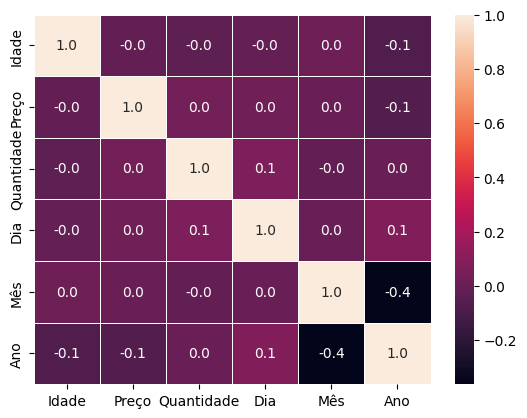

In [23]:
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [ ]:
df[numeric].describe()

,Idade,Preço,Quantidade,Dia,Mês,Ano
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,44.301397,3098.617305,5.752495,15.558882,6.321357,2023.842315
std,15.042838,3657.099579,2.863323,8.680036,3.403311,0.817977
min,18.000000,509.890000,1.000000,1.000000,1.000000,2022.000000
25%,32.000000,1772.050000,3.000000,8.000000,3.000000,2023.000000
50%,44.000000,2835.950000,6.000000,15.000000,6.000000,2024.000000
75%,57.000000,3710.160000,8.000000,23.000000,9.000000,2024.000000
max,70.000000,47611.600000,10.000000,31.000000,12.000000,2025.000000


In [ ]:
df[obj].describe()

,Cidade,Produto
count,501,501
unique,8,7
top,PA,Smartphone
freq,76,82


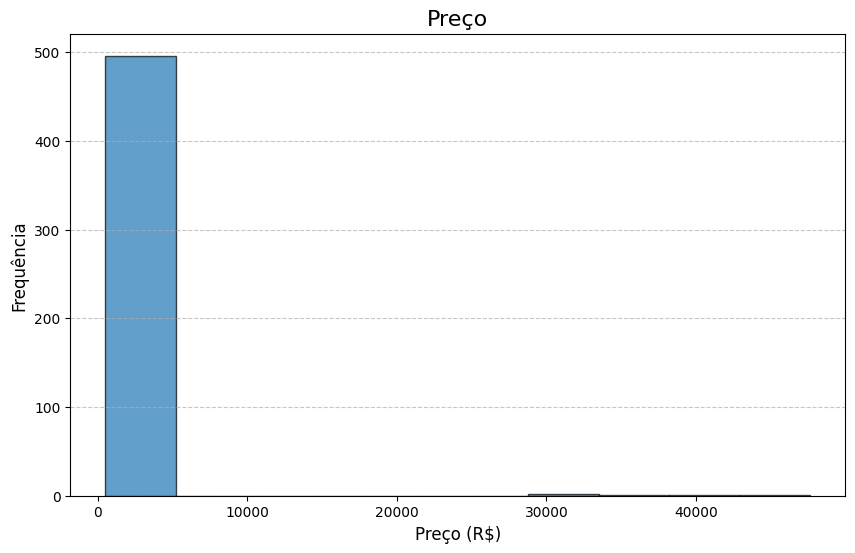

In [ ]:
df['Preço'].plot.hist(edgecolor='black', alpha=0.7, figsize=(10, 6))
plt.title('Preço', fontsize=16)
plt.xlabel('Preço (R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

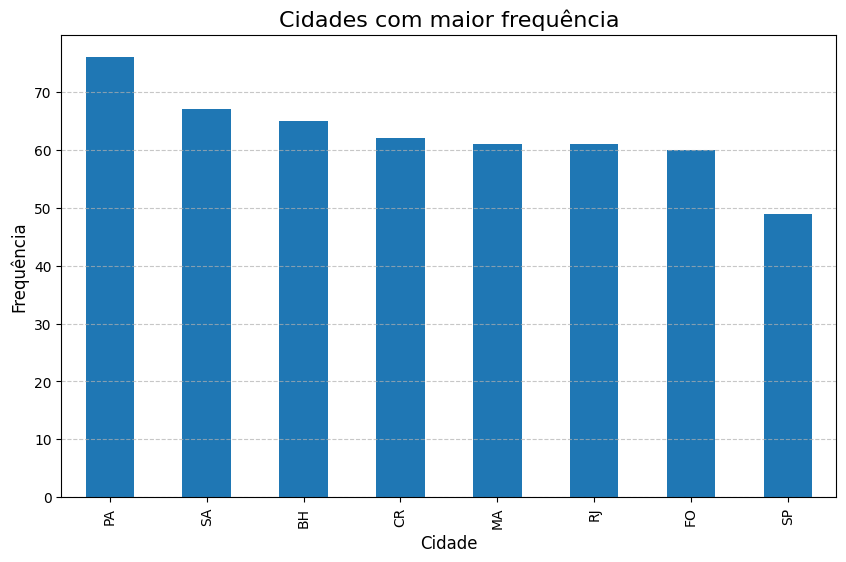

In [ ]:
df['Cidade'].value_counts().plot.bar(figsize=(10, 6))
plt.title('Cidades com maior frequência', fontsize=16)
plt.xlabel('Cidade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df.to_csv("dataset_tratado.csv")